In [1]:
#regressão utilizando o otimizador
#Definindo as bibliotecas
import numpy as np  #biblioteca necessária para trabalhar com os vetores e matrizes
import scipy   #biblioteca necessária para obter as funções de treinamento 
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
from scipy.optimize import curve_fit # biblioteca necessária para realiza a otimização dos MSE

In [2]:
#definindo as variáveis
idade=[18,25,57,45,26,64,37,40,24,33]  # variável independente
salarioAnual=[15000,29000,68000,52000,32000,80000,41000,45000,26000,33000] #variável dependente

xData = np.array(idade)    #transformando a lista em array
yData = np.array(salarioAnual) #transformando a lista em array

In [3]:
#define a função a ser otimizada (regressão simples)
def equacaoLinear(x, a, b): 
    return a * x + b

In [4]:
#gera os parâmetros iniciais para o otimizador
parametrosIniciais = np.array([1.0, 1.0])


In [5]:
#realiza a otimização através do erro médio quadrado (MSE)
parametrosOtimizados, pcov = curve_fit(equacaoLinear, xData, yData, parametrosIniciais)
#parametrosOtimizados - contém os parâmetros de ajuste da curva
#pcov - contém a covariância dos parâmetros encontrados


In [6]:
parametrosOtimizados

array([ 1320.53256667, -6627.65171673])

In [7]:
pcov

array([[ 3.40257832e+03, -1.25555141e+05],
       [-1.25555141e+05,  5.31788958e+06]])

In [8]:
#realiza a previsão dos dados através do modelo (constroi a equação linear)
pervisaoModelo = equacaoLinear(xData, *parametrosOtimizados) #utiliza a função linear com os parâmetros otimizados


In [9]:
pervisaoModelo

array([17141.93448327, 26385.66244994, 68642.70458328, 52796.31378328,
       27706.19501661, 77886.43254995, 42232.05324995, 46193.65094995,
       25065.12988328, 36949.92298328])

In [10]:
#encontra o erro obsoluto (linhas verticais)
erroAbsoluto = pervisaoModelo - yData #(valor previsto - valor real)


In [11]:
#calcula o erro quadrado entre cada medida
SE = np.square(erroAbsoluto) 
#calcula o MSE - Mean Squared Error
MSE = np.mean(SE) 
print('SE: ', SE)
print('MSE: ', MSE)



SE:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE:  5479238.909036714


In [12]:
#realiza o cálculo do coeficiente de determinação
Rsquared = 1.0 - (np.var(erroAbsoluto) / np.var(yData)) # numpy.var - encontra a variância entre os dados do vetor
print('Coeficiente de Determinação:', Rsquared)

Coeficiente de Determinação: 0.9846300347582353


In [13]:
#mostra os parâmetros da regressão
print('Y = {}X {}'.format(parametrosOtimizados[0],parametrosOtimizados[1]))

Y = 1320.5325666669085X -6627.651716729711


Text(0, 0.5, 'Salário Anual (R$)')

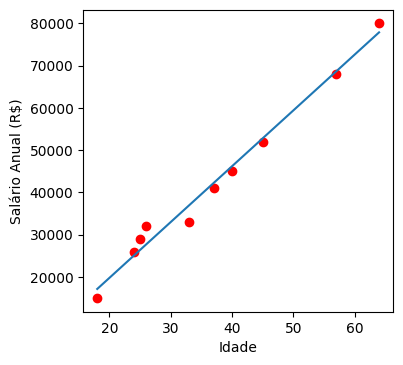

In [14]:
#realiza o plot da figura
f = plt.figure(figsize=(4, 4), dpi=100) #indica o tamanho da figura
axes = f.add_subplot(111) #cria os objetos para o subplot

# realiza o plot dos dados (pontos no gráfico)
axes.plot(xData, yData,'ro')

# cria os dados para serem utilizados na construção da linha (equação) 
xModel = np.linspace(min(xData), max(xData)) #encontra os valores maximos e mínimos da "linha"
yModel = equacaoLinear(xModel, *parametrosOtimizados) # acplica a função com os parâmetros obtidos

# realiza o plot da "linha"
axes.plot(xModel, yModel)
plt.xlabel("Idade")
plt.ylabel("Salário Anual (R$)")

**Agora vamos mostrar como o mesmo código ficaria com a utilização do Sklearn**

In [15]:
#utiliza as funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
reg= LinearRegression() #objeto para a regressão linear
x_ModeloSklern=xData.reshape((-1, 1)) # na regressão linear é necessário que o X seja 2D
regressao= reg.fit (x_ModeloSklern,yData) # realiza a regressão

In [18]:
x_ModeloSklern

array([[18],
       [25],
       [57],
       [45],
       [26],
       [64],
       [37],
       [40],
       [24],
       [33]])

In [19]:
previsao=reg.predict(x_ModeloSklern)

In [20]:
MSE= mean_squared_error(yData,previsao) # encontra o MSE através do sklearn
print('MSE: ', MSE)

MSE:  5479238.909036706


In [21]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score #método para o cálculo do R2

R_2 = r2_score(yData, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [1320.53256496]X -6627.651646877624
Coeficiente de Determinação (R2): 0.9846300347582353


**Agora vamos realizar a construção de uma regressão para um banco de dados real (mais complexo)**

In [22]:
#regressão utilizando um BD mais complexo
import pandas as pd


In [23]:
#realiza a leitura do banco de dados
data=pd.read_csv("headbrain.csv")
data.head()  #realiza visualização das 5 primeiras linhas do BD

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [24]:
data.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [26]:
data["Age Range"].unique()

array([1, 2])

In [27]:
data["Gender"].unique()

array([1, 2])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [29]:
#como o formato dos dados em cada uma das colunas do dataframe são séries é necessário converter array
x=data["Head Size(cm^3)"].values
y=data["Brain Weight(grams)"].values

In [30]:
#Realiza a construção do modelo de regressão
reg = LinearRegression()
x_Reshaped = x.reshape((-1, 1)) #coloca os dados no formato 2D
regressao = reg.fit (x_Reshaped, y) # encontra os coeficientes (realiza a regressão)

In [31]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)

In [32]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [0.26342934]X 325.5734210494426
Coeficiente de Determinação (R2): 0.639311719957


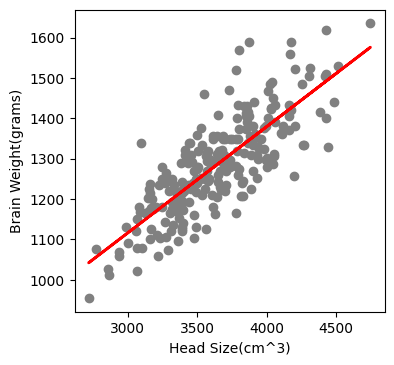

In [33]:
#realiza o plot dos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(x, y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()